In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def get_fitness(dir):
    criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

    fitness_header = ["DOL","DVE","DPD","DSM","DFD"]

    criterion = pd.read_csv(dir+'criterion.csv',names=criterion_header)
    fitness = pd.read_csv(dir+'fitness.csv',names=fitness_header)
    result = pd.DataFrame()
    
    result['RouteCompletionTest']   =   criterion["RouteCompletionTest_figure"]/100
    result['OutsideRouteLanesTest'] = 1-criterion["OutsideRouteLanesTest_figure"]/100
    result['CollisionTest']         =   criterion["CollisionTest"]
    result['RunningRedLightTest']   = 1-criterion["RunningRedLightTest"]
    result['RunningStopTest']       = 1-criterion["RunningStopTest"]
    result['InRouteTest']           = 1-criterion["InRouteTest"]
    result['AgentBlockedTest']      = 1-criterion["AgentBlockedTest"]
    result['Timeout']               = 1-criterion["Timeout"]
    
    DVE = fitness['DVE'].copy()/2
    DVE[fitness['DVE'] >= 2] = 1

    collisionTest = result['CollisionTest'].copy()
    collisionTest[result['CollisionTest']==0] = DVE[result['CollisionTest']==0]
    collisionTest[result['CollisionTest']==1] = 0

    result.loc[:,'CollisionTest'] = collisionTest
    
    return result

In [10]:
random_data = '../../data/routes_short_2023-07-13|17:37:13/'
NSGA_data_0 = '../../data/routes_short_2023-07-21|13:33:47/'
NSGA_data_1 = '../../../TCP/data/routes_short_2023-06-09|17:27:05/'
data_label = ['Random-Interfuser','NSGA-Interfuser','NSGA-TCP'] 

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

rename_criterions = ["PAR", 
                     "MOV", 
                     "MPL", 
                     "Timeout"]

random_fitness = get_fitness(random_data)[select_criterions]
NSGA_0_fitness = get_fitness(NSGA_data_0)[select_criterions]
NSGA_1_fitness = get_fitness(NSGA_data_1)[select_criterions]
print(random_fitness.shape)
print(NSGA_0_fitness.shape)
print(NSGA_1_fitness.shape)

(975, 4)
(734, 4)
(390, 4)


In [11]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

random_scenarios = pd.read_csv(random_data+'scenario.csv',names=scenario_header)
NSGA_0_scenarios = pd.read_csv(NSGA_data_0+'scenario.csv',names=scenario_header)
NSGA_1_scenarios = pd.read_csv(NSGA_data_1+'scenario.csv',names=scenario_header)

print(random_scenarios.shape)
print(NSGA_0_scenarios.shape)
print(NSGA_1_scenarios.shape)

(975, 14)
(734, 14)
(390, 14)


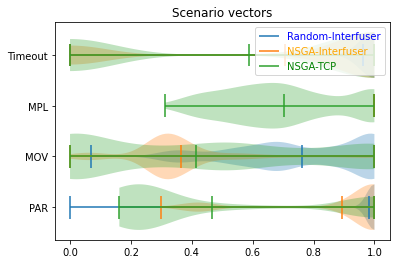

In [12]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(random_fitness, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(NSGA_0_fitness, vert=False, showmeans=True, widths=0.9)
vl3 = plt.violinplot(NSGA_1_fitness, vert=False, showmeans=True, widths=0.9)
plt.yticks(range(1, 5), rename_criterions)
plt.title("Scenario vectors")
plt.legend(handles=(vl1['cbars'],vl2['cbars'],vl3['cbars']), 
           labels=[data_label[0],data_label[1],data_label[2]],
           labelcolor=['blue','orange','green','red'],
           loc=1)

plt.show()

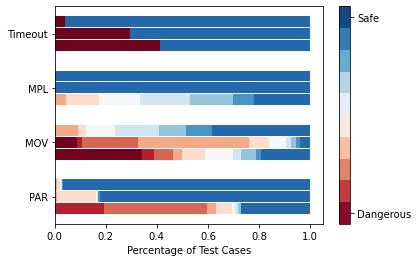

In [13]:
import matplotlib as mpl
cmap = mpl.cm.RdBu
colors = cmap(range(3,253,25))


rename_criterions = ["PAR", 
                     "MOV", 
                     "MPL", 
                     "Timeout"]


stack_hist_discrete = np.concatenate([
    [np.histogram(random_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(random_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)+0.22, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]


stack_hist_discrete = np.concatenate([
    [np.histogram(NSGA_0_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
    [np.histogram(NSGA_0_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
    [np.histogram(NSGA_0_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
    [np.histogram(NSGA_0_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4), width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]

stack_hist_discrete = np.concatenate([
    [np.histogram(NSGA_1_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
    [np.histogram(NSGA_1_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
    [np.histogram(NSGA_1_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
    [np.histogram(NSGA_1_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)-0.22, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]


plt.yticks(range(4), rename_criterions)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ticklocation='right',values=range(10), ticks=[0, 9])
cbar.ax.set_yticklabels(['Dangerous', 'Safe'])  # vertically oriented colorbar

plt.xlabel('Percentage of Test Cases')
# plt.title('Distribution of test case generatred by Random and 3 NSGA (from up to down)')
plt.show()

In [14]:
# plt.figure(figsize=(5,5))


# NSGA_data_0 = '../../data/routes_short_2023-07-20|17:23:07/'
# NSGA_data_1 = '../../data/routes_short_2023-07-21|13:33:47/'
# NSGA_data_2 = '../../data/routes_short_2023-07-22|10:22:40/'

# result_dirs = [
#     '../../surrogate/routes_short_2023-07-20|17:23:07/',
#     '../../surrogate/routes_short_2023-07-21|13:33:47/',
#     '../../surrogate/routes_short_2023-07-22|10:22:40/'
# ]
# data_labels = ['NSGA-1', 'NSGA-2', 'NSGA-3']

# for i, result_dir in enumerate(result_dirs):
#     NSGA_result = np.load(result_dir+'output.npz')
#     # scenario = NSGA_result['arr_0']
#     criterion = NSGA_result['arr_1']
#     criterion = criterion[np.argsort(criterion,axis=0)[:,0]]
#     plt.scatter(x=criterion[:,0], y=criterion[:,2])
#     plt.plot(criterion[:,0], criterion[:,2], label=data_labels[i])

# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.xlabel('RouteCompletionTest')
# plt.ylabel('CollisionTest')
# plt.legend()
# plt.show()

In [26]:
random_data

'../../data/routes_short_2023-07-13|17:37:13/'

In [36]:
scenarios

,cloudiness,precipitation,precipitation_deposits,wind_intensity,sun_azimuth_angle,sun_altitude_angle,fog_density,wetness,fog_falloff,vehicle_infront,vehicle_opposite,vehicle_side,start_offset,end_offset
0,0.417022,0.720324,0.000114,0.302333,0.146756,0.092339,0.186260,0.345561,0.396767,0.538817,0.419195,0.685220,0.204452,0.878117
1,0.027388,0.670468,0.417305,0.558690,0.140387,0.198101,0.800745,0.968262,0.313424,0.692323,0.876389,0.894607,0.085044,0.039055
2,0.169830,0.878143,0.098347,0.421108,0.957890,0.533165,0.691877,0.315516,0.686501,0.834626,0.018288,0.750144,0.988861,0.748166
3,0.280444,0.789279,0.103226,0.447894,0.908596,0.293614,0.287775,0.130029,0.019367,0.678836,0.211628,0.265547,0.491573,0.053363
4,0.574118,0.146729,0.589306,0.699758,0.102334,0.414056,0.694400,0.414179,0.049953,0.535896,0.663795,0.514889,0.944595,0.586555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.875138,0.880924,0.679208,0.260586,0.926604,0.976064,0.959709,0.874536,0.633914,0.778291,0.656711,0.418304,0.720499,0.875114
386,0.857797,0.759816,0.721691,0.555019,0.942944,0.356762,0.702693,0.890907,0.737040,0.536412,0.508959,0.686338,0.763585,0.875859
387,0.871838,0.879600,0.790128,0.936302,0.915223,0.376524,0.701196,0.862328,0.635026,0.781353,0.697698,0.441050,0.556574,0.875999
388,0.436068,0.767993,0.706525,0.174903,0.022474,0.357119,0.701196,0.864686,0.772217,0.768993,0.721824,0.437895,0.557388,0.813629


In [42]:
paint_header = ['cloudiness',
 'precipitation',
 'precipitation_deposits',
 'wetness',
 'wind_intensity',
 'fog_density',
 'fog_falloff',
 'sun_azimuth_angle',
 'sun_altitude_angle',
 'vehicle_infront',
 'vehicle_opposite',
 'vehicle_side',
 'start_offset',
 'end_offset']

paint_header.reverse()

In [94]:
a = ['cloudiness',
            'precipitation',
            'precipitation deposits',
            'wetness',
            'wind intensity',
            'fog density',
            'fog falloff',
            'sun azimuth angle',
            'sun altitude angle',
            'vehicle infront',
            'vehicle opposite',
            'vehicle side',
            'start offset',
            'end offset']
a.reverse()
a

['end offset',
 'start offset',
 'vehicle side',
 'vehicle opposite',
 'vehicle infront',
 'sun altitude angle',
 'sun azimuth angle',
 'fog falloff',
 'fog density',
 'wind intensity',
 'wetness',
 'precipitation deposits',
 'precipitation',
 'cloudiness']

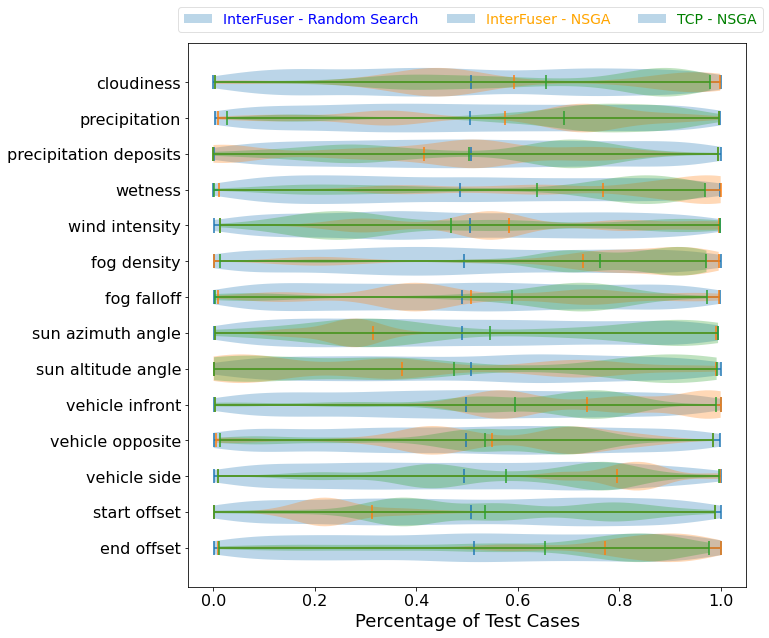

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for data in [random_data,NSGA_data_0,NSGA_data_1]:
    scenarios = pd.read_csv(data+'scenario.csv',names=scenario_header)
    plt.violinplot(scenarios[paint_header], vert=False, showmeans=True, widths=0.8)
plt.yticks(range(1, 15), 
           ['end offset',
            'start offset',
            'vehicle side',
            'vehicle opposite',
            'vehicle infront',
            'sun altitude angle',
            'sun azimuth angle',
            'fog falloff',
            'fog density',
            'wind intensity',
            'wetness',
            'precipitation deposits',
            'precipitation',
            'cloudiness'],fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Percentage of Test Cases', fontsize=18)
# plt.xticks(fontsize=16)
# plt.title("Scenario vectors", fontsize=18)
plt.legend(['InterFuser - Random Search','InterFuser - NSGA', 'TCP - NSGA'],
           labelcolor=['blue','orange','green'], 
           framealpha=0.6, fontsize=14, loc=2,
           bbox_to_anchor=(-0.03,1.08),
           ncol = 3
           )

plt.show()

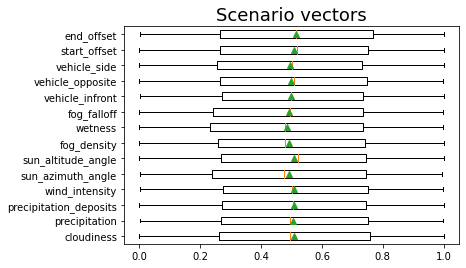

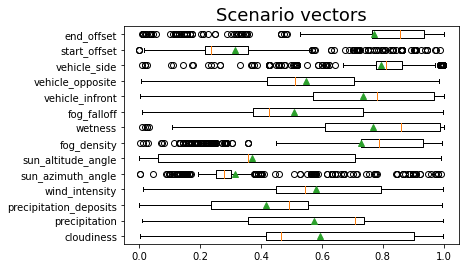

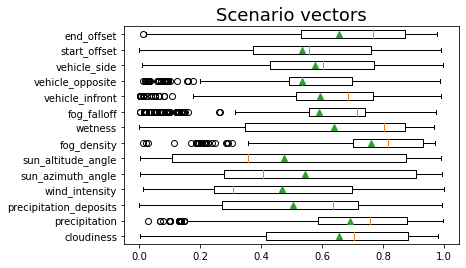

In [61]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

for data in [random_data,NSGA_data_0,NSGA_data_1]:
    scenarios = pd.read_csv(data+'scenario.csv',names=scenario_header)
    # plt.figure(figsize=(20,2))
    plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
    plt.title("Scenario vectors", fontsize=18)
    plt.show()

,RouteCompletionTest,CollisionTest,Timeout
0,1.0000,0.195469,1
1,0.3635,0.000000,1
2,1.0000,0.969070,1
3,1.0000,1.000000,1
4,1.0000,0.198775,1
...,...,...,...
385,0.1879,0.000000,1
386,0.2126,0.000000,1
387,0.1876,0.000000,1
388,0.1948,0.000000,1


In [97]:
a

['end offset',
 'start offset',
 'vehicle side',
 'vehicle opposite',
 'vehicle infront',
 'sun altitude angle',
 'sun azimuth angle',
 'fog falloff',
 'fog density',
 'wind intensity',
 'wetness',
 'precipitation deposits',
 'precipitation',
 'cloudiness']

In [113]:
paint_header.reverse()
a.reverse()

['PAR', 'MOV', 'MPL', 'Timeout']

In [116]:
fitness

,RouteCompletionTest,CollisionTest,OutsideRouteLanesTest,Timeout
0,1.0000,0.195469,1.0000,1
1,0.3635,0.000000,0.9146,1
2,1.0000,0.969070,1.0000,1
3,1.0000,1.000000,1.0000,1
4,1.0000,0.198775,1.0000,1
...,...,...,...,...
385,0.1879,0.000000,0.9473,1
386,0.2126,0.000000,0.9525,1
387,0.1876,0.000000,0.9513,1
388,0.1948,0.000000,0.8058,1


In [120]:
rename_criterions.reverse()

(nan, nan)


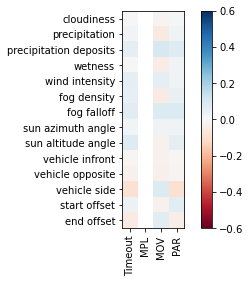

(nan, nan)


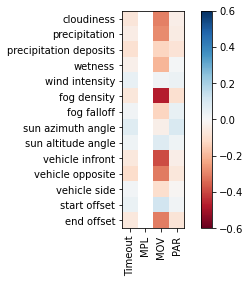

(-0.658, 0.218)


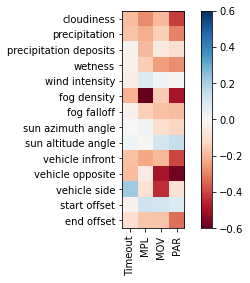

In [121]:
# select_criterions = ["RouteCompletionTest", "CollisionTest", "Timeout"] 

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]
select_criterions.reverse()

for data,fitness in [(random_data,random_fitness),
                     (NSGA_data_0,NSGA_0_fitness),
                     (NSGA_data_1,NSGA_1_fitness)]:

    scenario_criterion = pd.concat([scenarios[paint_header], fitness[select_criterions]],axis=1)

    print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:17].min(), 3), 
                            round(scenario_criterion.corr().to_numpy()[:14, 14:17].max(), 3)))

    plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.6, vmax=0.6)
    plt.yticks(range(14),a)
    plt.xticks(range(4),rename_criterions,rotation=90)
    plt.colorbar()
    plt.show()
    # Positive means easy to cause failure

/home/guannan/miniconda3/envs/TCP/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


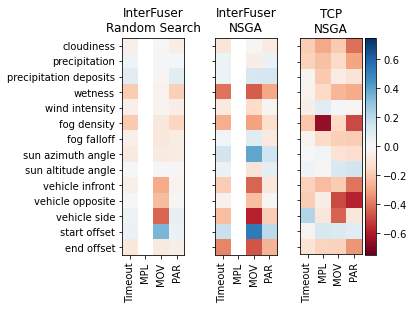

In [136]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(4.7, 4), sharey=True)


ax1.set_title('InterFuser\nRandom Search')
scenario_criterion = pd.concat([random_scenarios[paint_header], random_fitness[select_criterions]],axis=1)
# print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        # round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig1 = ax1.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)
# plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)

ax2.set_title('InterFuser\nNSGA')
scenario_criterion = pd.concat([NSGA_0_scenarios[paint_header], NSGA_0_fitness[select_criterions]],axis=1)
# print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        # round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig2 = ax2.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)

ax3.set_title('TCP\nNSGA')
scenario_criterion = pd.concat([NSGA_1_scenarios[paint_header], NSGA_1_fitness[select_criterions]],axis=1)
# print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        # round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig3 = ax3.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)


ax1.set_yticks(range(14),a)
ax1.set_xticks(range(4),rename_criterions,rotation=90)
ax2.set_xticks(range(4),rename_criterions,rotation=90)
ax3.set_xticks(range(4),rename_criterions,rotation=90)
# plt.yticks([])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
fig.colorbar(fig1, cmap='RdBu')

plt.show()